<a href="https://colab.research.google.com/github/ricardopeloi/o_mais_novo_day_trader_do_brasil/blob/main/O_mais_novo_Day_Trader_do_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [CONFIG] Configuração básica

In [ ]:
# !python -m pip install findspark

# !python -m pip install google.colab

# pip install opencv-python
# !python -m pip install opencv-python

## Sistema

In [ ]:
# from os import makedirs
# import os
# import glob

## Básicos (numpy, pandas, math, display, locale, time, random, re)

In [ ]:
# !python -m pip install pandas
# !python -m pip install openpyxl
# !python -m pip install xlrd
# !python -m pip install jupyter
# !python -m pip install numpy
# # !python -m pip install random
# !python -m pip install IPython


from IPython.display import display

import pandas as pd
import math
import numpy as np
import locale
# locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")  # Use "" for auto, or force e.g. to "en_US.UTF-8"

import time
from datetime import datetime, timedelta, date
import random

import openpyxl

## Visualização (matplotlib, seaborn, import plotly)

In [ ]:
# !python -m pip install matplotlib
# !python -m pip install seaborn
!python -m pip install plotly

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## Séries temporais (statsmodels)

In [ ]:
# # !python -m pip install statsmodels

# from statsmodels.tsa.seasonal import seasonal_decompose

## Redes neurais (tensorflow, keras)

In [ ]:
# # !python -m pip install tensorflow

# import tensorflow as tf
# from tensorflow.keras.utils import to_categorical

# from keras.models import Sequential
# from keras.layers import Dense

## Finanças (yfinance)

In [ ]:
# https://pypi.org/project/yfinance/
# https://github.com/ranaroussi/yfinance/wiki/Ticker

!python -m pip install yfinance
import yfinance as yf

# !pip install mplfinance
# import mplfinance as mpf

# # Em R
# # https://cran.r-project.org/web/packages/BatchGetSymbols/index.html

## Leitura de dados em sites e APIs (Beautiful Soup e requests)

In [ ]:
# !python -m pip install BeautifulSoup
from bs4 import BeautifulSoup

# !python -m pip install requests
import requests

## Regresão (sklearn)

In [ ]:
# !python -m pip install sklearn

from sklearn.linear_model import LinearRegression

## Drive (para ler e escrever arquivos)

In [ ]:
from google.colab import drive
from google.colab import auth
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
drive.mount('/content/drive')

Mounted at /content/drive


# Funções

## Regressão linear com pontos de uma ação

In [ ]:
def criar_regressao_bd_acao(
  bd_acao,
  coluna = "Close",
  print_variaveis = False,
  plot_grafico = False,
  tamanho_figsize = (10,5),
  rotacao = 45,
  titulo = "Pontos no fechamento da ação",
  var_pular_final_de_semana_feriados = False,
):
  # bd_acao

  bd_acao_coluna = bd_acao.reset_index()[[bd_acao.index.name, coluna]]
  # bd_acao_coluna

  # from sklearn.linear_model import LinearRegression

  X = bd_acao_coluna.reset_index()["index"].array.reshape(-1, 1)
  y = bd_acao_coluna.loc[:, coluna].array.reshape(-1, 1)

  modelo_linear = LinearRegression()
  modelo_linear.fit(X, y)

  bd_acao_coluna.loc[:, "Regressão"] = modelo_linear.predict(X)
  # bd_acao_fim

  desvio_padrao = bd_acao_coluna[coluna].std()
  media = bd_acao_coluna[coluna].mean()
  alfa = modelo_linear.coef_[0][0]
  valor_fechamento = bd_acao_coluna.sort_index(ascending = False).iloc[0][coluna]

  # margem = 0.005
  margem = desvio_padrao/media

  if print_variaveis == True:
    display("Média: " + "{:.4f}".format(media))
    display("Desvio padrão: " + "{:.4f}".format(desvio_padrao))
    display("Desvio padrão (%): " + "{:.4f}".format(margem))
    display("Inclinação da reta (alfa, coeficiente angular): " + "{:.4f}".format(alfa))
    display("Valor de fechamento (R$): " + "{:.2f}".format(valor_fechamento))


  if plot_grafico == True:
    plt.figure(figsize = tamanho_figsize)

    ax = plt.gca()

    if var_pular_final_de_semana_feriados == True:
      ax.xaxis.set_major_locator(ticker.LinearLocator(len(bd_acao_coluna)))
      # ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
      # ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt = "%d/%m/%y"))

      plt.xticks(rotation = rotacao)

      plt.scatter(x = bd_acao_coluna[bd_acao.index.name].dt.strftime("%d/%m/%y").astype(str), y = coluna, data = bd_acao_coluna, edgecolors='black', facecolors='none')

      plt.plot(bd_acao_coluna[bd_acao.index.name].dt.strftime("%d/%m/%y").astype(str), bd_acao_coluna["Regressão"]-desvio_padrao, color = "blue", linestyle='dashed')
      plt.plot(bd_acao_coluna[bd_acao.index.name].dt.strftime("%d/%m/%y").astype(str), bd_acao_coluna["Regressão"], color='green')
      plt.plot(bd_acao_coluna[bd_acao.index.name].dt.strftime("%d/%m/%y").astype(str), bd_acao_coluna["Regressão"]+desvio_padrao, color = "blue", linestyle='dashed')

      # ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt = "%d/%m/%y"))
      # ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

    else:
      ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

      plt.xticks(bd_acao_coluna[bd_acao.index.name], rotation = rotacao)

      plt.scatter(x = bd_acao_coluna[bd_acao.index.name], y = coluna, data = bd_acao_coluna, edgecolors='black', facecolors='none')

      plt.plot(bd_acao_coluna[bd_acao.index.name], bd_acao_coluna["Regressão"]-desvio_padrao, color = "blue", linestyle='dashed')
      plt.plot(bd_acao_coluna[bd_acao.index.name], bd_acao_coluna["Regressão"], color='green')
      plt.plot(bd_acao_coluna[bd_acao.index.name], bd_acao_coluna["Regressão"]+desvio_padrao, color = "blue", linestyle='dashed')


    plt.title(titulo)
    plt.show()

  return [bd_acao_coluna, media, desvio_padrao, modelo_linear, valor_fechamento]

## Candle plot no Plotly (análise de ações)

In [ ]:
def candle_plot(
    dados,
    volume = True,
    mav = np.nan,
    colors = ["orange", "yellow", "blue"],
    titulo = "",
    ):

  if volume == True:
    fig = make_subplots(
        rows = 2,
        cols = 1,
        shared_xaxes = True,
        vertical_spacing = 0.1,
        subplot_titles = ("Candlesticks", "Volume transacionado"),
        row_width = [0.2, 0.7]
    )
  else:
    fig = make_subplots(
        rows = 1,
        cols = 1,
        shared_xaxes = True,
        vertical_spacing = 0.1,
        subplot_titles = ("Candlesticks"),
        row_width = [0.2, 0.7]
    )

  fig.add_trace(go.Candlestick(x=dados.index,
                      open = dados['Open'],
                      high = dados['High'],
                      low = dados['Low'],
                      close = dados['Close']),
                row = 1, col = 1)

  if mav is not np.nan:
    for i in range(len(mav)):
      # print(i)
      dados["Close "+ str(mav[i]) +" dias"] = dados["Close"].rolling(window=mav[i]).mean()
      fig.add_trace(go.Scatter(x=dados.index,
                          y = dados["Close "+ str(mav[i]) +" dias"],
                          mode = "lines",
                          name = "Média móvel fechamento " + str(mav[i]) + " dias",
                          marker=dict(color=colors[i])),
                    row = 1, col = 1)

  if volume == True:
    fig.add_trace(go.Bar(x=dados.head(60).index,
                        y = dados['Volume'],
                        name = "Volume"),
                  row = 2, col = 1)


  fig.update_layout(
      yaxis_title = "Preço",
      xaxis_rangeslider_visible=False,
      title=titulo,
      )

  fig.show()

# candle_plot(
#     dados = dados_candle_matp_media_movel.head(60),
#     volume = True,
#     mav = [7,14],
#     # colors = ["orange", "yellow", "blue"],
#     titulo = "PETR4.SA",
#     )

# Variáveis globais

## Caminho da pasta

In [ ]:
caminho_da_pasta = '/content/drive/My Drive/Trabalho/Investimentos/'

## Ler e escrever na pasta

In [ ]:
# ler_escrever_na_pasta = True
ler_escrever_na_pasta = False

if ler_escrever_na_pasta == True:
  gc = gspread.authorize(creds)
  drive.mount('/content/drive')

# Leitura

## Lista completa de ações da B3

In [ ]:
if ler_escrever_na_pasta == False:
  url = "https://www.dadosdemercado.com.br/bolsa/acoes"
  response = requests.get(url)

  # Create a BeautifulSoup object with the HTML content
  soup = BeautifulSoup(response.content, 'html.parser')
  # soup


  soup_tabela_acoes = soup.find('div', class_='table-container').find_all("tr")
  lista_acoes = []
  # data_de_hoje = "Volume em " + datetime.now().strftime("%d/%m/%Y")
  data_de_hoje = "Volume no último dia útil (lido em " + datetime.now().strftime("%d/%m/%Y") + ")"

  for soup_acao in soup_tabela_acoes:
    # print("")
    try:
      lista_acoes.append({
          "Nome da Empresa": soup_acao.find_all("td")[1].text.strip(),
          "Ticker": soup_acao.find("a").text.strip(),
          data_de_hoje: soup_acao.find_all("td")[2].text.strip()
      })
    except:
      pass

  bd_lista_acoes = pd.DataFrame(lista_acoes)
  bd_lista_acoes[data_de_hoje] = bd_lista_acoes[data_de_hoje].str.replace(".", "").astype(int)
  bd_lista_acoes.to_excel(caminho_da_pasta + 'Bases/Lista de ações.xlsx')

elif ler_escrever_na_pasta == True:
  bd_lista_acoes = pd.read_excel(
    caminho_da_pasta + 'Bases/Lista de ações.xlsx',
    # encoding = 'ISO-8859-1',
    # low_memory=False,
    index_col = 0
  )

bd_lista_acoes#.info()

,Nome da Empresa,Ticker,Volume no último dia útil (lido em 03/05/2024)
0,Magazine Luiza,MGLU3,129948300
1,Banco Bradesco,BBDC4,79939800
2,Hapvida,HAPV3,64792500
3,Hidrovias do Brasil,HBSA3,59665400
4,B3,B3SA3,45228600
...,...,...,...
398,Banco do Nordeste,BNBR3,100
399,Fica,FIEI3,3800
400,Energisa MT,ENMT4,300
401,Eletrobras,ELET5,100


In [ ]:
# len(bd_lista_acoes["Ticker"].unique())
# bd_lista_acoes.groupby(["Ticker"]).count().sort_values("Nome da Empresa", ascending = False)
# bd_lista_acoes[(bd_lista_acoes["Ticker"] == "IGTI4") + (bd_lista_acoes["Ticker"] == "IGTI3")]

bd_lista_acoes = bd_lista_acoes[bd_lista_acoes["Nome da Empresa"] != "Jereissati Participações"]
bd_lista_acoes = bd_lista_acoes.set_index("Ticker")

bd_lista_acoes

,Nome da Empresa,Volume no último dia útil (lido em 03/05/2024)
Ticker,,
MGLU3,Magazine Luiza,129948300
BBDC4,Banco Bradesco,79939800
HAPV3,Hapvida,64792500
HBSA3,Hidrovias do Brasil,59665400
B3SA3,B3,45228600
...,...,...
BNBR3,Banco do Nordeste,100
FIEI3,Fica,3800
ENMT4,Energisa MT,300


## Montando base completa

,Nome da Empresa,Volume no último dia útil (lido em 03/05/2024),Market Cap
Ticker,,,
MGLU3,Magazine Luiza,129948300,1.136950e+10
BBDC4,Banco Bradesco,79939800,1.384586e+11
HAPV3,Hapvida,64792500,2.892780e+10
HBSA3,Hidrovias do Brasil,59665400,3.444535e+09
B3SA3,B3,45228600,6.396013e+10
...,...,...,...
RSID3,Rossi Residencial,24400,1.124054e+08
BOBR4,Bombril,22900,2.740536e+08
TPIS3,Triunfo,22300,1.683016e+08


<Axes: >

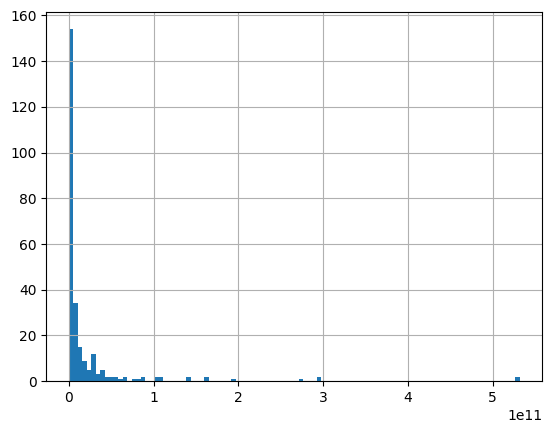

In [ ]:
var_corte_market_cap = 50000000
var_corte_volume = 20000
var_coluna_volume = [col for col in bd_lista_acoes.columns if "Volume" in col]

if ler_escrever_na_pasta == False:
  for ticker_acao in bd_lista_acoes.index:
    acao = yf.Ticker(ticker_acao + ".SA")
    try:
      bd_lista_acoes.loc[ticker_acao, "Market Cap"] = acao.info["marketCap"]
    except:
      pass

    # try:
    #   bd_lista_acoes.loc[ticker_acao, "Quote Type"] = acao.info["quoteType"]
    # except:
    #   pass

  # display(bd_lista_acoes)

  # bd_lista_acoes.groupby("Quote Type").count()
  # bd_lista_acoes["Market Cap"].hist(bins = 100)


  bd_lista_acoes_tratada = bd_lista_acoes[
      (bd_lista_acoes["Market Cap"] >= var_corte_market_cap)
      * (bd_lista_acoes[var_coluna_volume].iloc[:, 0] >= var_corte_volume)
      # * (~bd_lista_acoes["Quote Type"].isna()) \
      ]


  bd_lista_acoes_tratada.to_excel(caminho_da_pasta + 'Bases/Lista de ações Tratada.xlsx')


elif ler_escrever_na_pasta == True:
  bd_lista_acoes_tratada = pd.read_excel(
    caminho_da_pasta + 'Bases/Lista de ações Tratada.xlsx',
    # encoding = 'ISO-8859-1',
    # low_memory=False,
    index_col = 0
  )


bd_lista_acoes_tratada.sort_values([col for col in bd_lista_acoes_tratada.columns if "Volume" in col], ascending = False)
display(bd_lista_acoes_tratada)
# bd_lista_acoes_tratada.groupby("Quote Type").count()
bd_lista_acoes_tratada["Market Cap"].hist(bins = 100)

# Exemplo gráfico intradiário _yfinance_ (comentado)

In [ ]:
# bd_lista_acoes.index[0]

In [ ]:
# # acao = "PETR4.SA"
# # acao = "BOBR4.SA"
# acao = bd_lista_acoes_tratada.index[0] + ".SA"


# bd_acao = yf.Ticker(acao).history(
#     period = "1d",
#     interval = "15m"
# )
# bd_acao.index = bd_acao.index.tz_localize(None)

# bd_acao

In [ ]:
# bd_acao.reset_index().info()

## Média do início e fim do período

In [ ]:
# bd_acao["Média"] = (bd_acao["Close"] + bd_acao["Open"])/2
# bd_acao

In [ ]:
# bd_acao_media = bd_acao.reset_index()[["Datetime", "Média"]]

# bd_acao_media

### Visualização da média

In [ ]:
# plt.scatter(x = "Datetime", y = "Média", data = bd_acao_media)

### Regressão linear

In [ ]:
# # from sklearn.linear_model import LinearRegression


# X = bd_acao_media.reset_index()["index"].array.reshape(-1, 1)
# y = bd_acao_media.loc[:, "Média"].array.reshape(-1, 1)

# modelo_linear = LinearRegression()
# modelo_linear.fit(X, y)

# bd_acao_media["Regressão"] = modelo_linear.predict(X)

# bd_acao_media

In [ ]:
# plt.figure(figsize = (10,5))

# plt.scatter(x = "Datetime", y = "Média", data = bd_acao_media, edgecolors='black', facecolors='none')

# # margem = 0.005
# # margem = bd_acao_media["Média"].std()
# media = bd_acao_media["Média"].mean()
# desvio_padrao = bd_acao_media["Média"].std()
# alfa = modelo_linear.coef_[0][0]

# display("Média: " + "{:.4f}".format(media))
# display("Desvio padrão: " + "{:.4f}".format(desvio_padrao))
# display("Desvio padrão (%): " + "{:.4f}".format(desvio_padrao/media))
# display("Inclinação da reta (alfa, coeficiente angular): " + "{:.4f}".format(alfa))

# plt.plot(bd_acao_media["Datetime"], bd_acao_media["Regressão"]-desvio_padrao, color = "blue", linestyle='dashed')
# plt.plot(bd_acao_media["Datetime"], bd_acao_media["Regressão"], color='green')
# plt.plot(bd_acao_media["Datetime"], bd_acao_media["Regressão"]+desvio_padrao, color = "blue", linestyle='dashed')

# ax = plt.gca()
# plt.xticks(bd_acao_media["Datetime"], rotation = 45)
# ax.xaxis.set_major_formatter(
#     mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

# plt.title(acao + " (média início e fim do período)")
# plt.show()

## Apenas fim

In [ ]:
# # bd_acao

# bd_acao_fim = bd_acao.reset_index()[["Datetime", "Close"]]
# # bd_acao_fim

# # from sklearn.linear_model import LinearRegression

# X = bd_acao_fim.reset_index()["index"].array.reshape(-1, 1)
# y = bd_acao_fim.loc[:, "Close"].array.reshape(-1, 1)

# modelo_linear = LinearRegression()
# modelo_linear.fit(X, y)

# bd_acao_fim["Regressão"] = modelo_linear.predict(X)

# bd_acao_fim

In [ ]:
# plt.figure(figsize = (10,5))

# plt.scatter(x = "Datetime", y = "Close", data = bd_acao_fim, edgecolors='black', facecolors='none')

# # margem = 0.005
# desvio_padrao = bd_acao_fim["Close"].std()
# media = bd_acao_fim["Close"].mean()
# alfa = modelo_linear.coef_[0][0]

# display("Média: " + "{:.4f}".format(media))
# display("Desvio padrão: " + "{:.4f}".format(desvio_padrao))
# display("Desvio padrão (%): " + "{:.4f}".format(desvio_padrao/media))
# display("Inclinação da reta (alfa, coeficiente angular): " + "{:.4f}".format(alfa))

# plt.plot(bd_acao_fim["Datetime"], bd_acao_fim["Regressão"]-desvio_padrao, color = "blue", linestyle='dashed')
# plt.plot(bd_acao_fim["Datetime"], bd_acao_fim["Regressão"], color='green')
# plt.plot(bd_acao_fim["Datetime"], bd_acao_fim["Regressão"]+desvio_padrao, color = "blue", linestyle='dashed')

# ax = plt.gca()
# plt.xticks(bd_acao_fim["Datetime"], rotation = 45)
# ax.xaxis.set_major_formatter(
#     mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

# plt.title(acao + " (fechamento)")
# plt.show()

## Função completa

In [ ]:
# acao = bd_lista_acoes_tratada.index[0] + ".SA"
# bd_acao = yf.Ticker(acao).history(
#     period = "1d",
#     interval = "15m"
# )
# bd_acao.index = bd_acao.index.tz_localize(None)

# criar_regressao_bd_acao(
#   bd_acao,
#   coluna = "Close",
#   print_variaveis = True,
#   plot_grafico = True,
#   titulo = acao + " (fechamento)"
# );

# Exemplo detecção de martelo

In [ ]:
# # acao = bd_lista_acoes_tratada.index[0] + ".SA"
# acao = "PETR3" + ".SA"
# print(acao )
# bd_acao = yf.Ticker(acao).history(
#     period = "21d",
#     interval = "1d"
# )
# bd_acao["Amplitude Open-Close"] = abs(bd_acao["Open"] - bd_acao["Close"])
# bd_acao["Amplitude High-Low"] = abs(bd_acao["High"] - bd_acao["Low"])

# taxa_máxima_para_ser_martelo = 0.2
# bd_acao["Martelo?"] = (bd_acao["Amplitude Open-Close"] < taxa_máxima_para_ser_martelo * bd_acao["Amplitude High-Low"])


# [bd_acao_coluna, media, desvio_padrao, modelo_linear, valor_fechamento] = criar_regressao_bd_acao(
#   bd_acao,
#   coluna = "Close",
#   print_variaveis = True,
#   plot_grafico = True,
#   titulo = acao + " (fechamento)"
# );

# display(bd_acao[bd_acao["Martelo?"] == True])

# # df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

# fig = go.Figure(data=[go.Candlestick(x=bd_acao.index,
#                 open = bd_acao['Open'],
#                 high = bd_acao['High'],
#                 low = bd_acao['Low'],
#                 close = bd_acao['Close'])])
# fig.update_layout(
#     # xaxis_rangeslider_visible=False,
#     title=acao,
#     )
# fig.show()

In [ ]:
# lista_datas_martelo = bd_acao[bd_acao["Martelo?"] == True].sort_index(ascending = False).index.to_pydatetime()
# string_datas_martelo = ""
# for data in lista_datas_martelo:
#   string_datas_martelo = data.strftime("%d/%m/%y") + ", " + string_datas_martelo

# string_datas_martelo[:-2]

## Função completa (plota candlestick acha martelos)

In [ ]:
def plota_candlestick_acha_martelos(
    acao,
    periodo = "21d",
    intervalo = "1d",
    taxa_máxima_para_ser_martelo = 0.2,
    display_tabela_martelo = True,
    display_candlestick = True,

  ):

  bd_acao = yf.Ticker(acao).history(
      period = periodo,
      interval = intervalo
  )
  bd_acao["Amplitude Open-Close"] = abs(bd_acao["Open"] - bd_acao["Close"])
  bd_acao["Amplitude High-Low"] = abs(bd_acao["High"] - bd_acao["Low"])

  # taxa_máxima_para_ser_martelo = 0.2
  bd_acao["Martelo?"] = (bd_acao["Amplitude Open-Close"] < taxa_máxima_para_ser_martelo * bd_acao["Amplitude High-Low"])

  lista_datas_martelo = bd_acao[bd_acao["Martelo?"] == True].sort_index(ascending = False).index.to_pydatetime()
  string_datas_martelo = ""
  for data in lista_datas_martelo:
    string_datas_martelo = data.strftime("%d/%m/%y") + ", " + string_datas_martelo

  # string_datas_martelo[:-2]


  if display_tabela_martelo == True:
    display(bd_acao[bd_acao["Martelo?"] == True])

  if display_candlestick == True:
    candle_plot(
    bd_acao,
    volume = True,
    # mav = np.nan,
    # colors = ["orange", "yellow", "blue"],
    titulo = acao,
    )

  return [bd_acao, string_datas_martelo]

[_, string_datas_martelo] = plota_candlestick_acha_martelos(
    acao =  "PETR3" + ".SA",
    periodo = "60d",
    intervalo = "1d",
    taxa_máxima_para_ser_martelo = 0.2,
    display_tabela_martelo = True,
    display_candlestick = True,
  );

display(string_datas_martelo)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Amplitude Open-Close,Amplitude High-Low,Martelo?
Date,,,,,,,,,,
2024-02-21 00:00:00-03:00,40.798918,41.210653,40.639841,40.901852,7858600,0.0,0.0,0.102934,0.570811,True
2024-02-22 00:00:00-03:00,41.079648,41.126436,40.228112,40.929928,9570500,0.0,0.0,0.149721,0.898324,True
2024-02-23 00:00:00-03:00,40.864422,40.920568,40.218752,40.817635,13303800,0.0,0.0,0.046787,0.701816,True
2024-03-07 00:00:00-03:00,38.665400,39.049059,38.478248,38.609253,7828400,0.0,0.0,0.056147,0.570811,True
2024-03-08 00:00:00-03:00,34.417070,35.521261,33.191233,34.604221,81532400,0.0,0.0,0.187152,2.330028,True
2024-03-15 00:00:00-03:00,34.304781,34.622937,34.108273,34.314137,19056600,0.0,0.0,0.009356,0.514665,True
2024-03-18 00:00:00-03:00,34.576150,34.697799,33.546817,34.604221,13273300,0.0,0.0,0.028072,1.150982,True
2024-04-04 00:00:00-03:00,36.793887,38.206879,36.213720,36.606735,35243500,0.0,0.0,0.187152,1.993159,True
2024-04-05 00:00:00-03:00,36.513164,36.962326,35.689698,36.531879,14912300,0.0,0.0,0.018716,1.272627,True


'21/02/24, 22/02/24, 23/02/24, 07/03/24, 08/03/24, 15/03/24, 18/03/24, 04/04/24, 05/04/24, 09/04/24, 17/04/24, 23/04/24, 30/04/24, 02/05/24, '

# Detecta 2 inclinações (alfas) e martelos de cada ação no maior período

In [ ]:
# qtd_dias = int(np.round(55/7*5))
# bd_acao = yf.Ticker(bd_lista_acoes_tratada.index[0] + ".SA").history(
#     # period = "30d",
#     start = datetime.today() - timedelta(days=qtd_dias),
#     end = datetime.today(),
#     interval = "1d"
# )
# bd_acao.index = bd_acao.index.tz_localize(None)
# # bd_acao.index.name

# [_, _, _, modelo_linear, _] = criar_regressao_bd_acao(
#   bd_acao,
#   coluna = "Close",
#   print_variaveis = True,
#   plot_grafico = True,
#   titulo = bd_lista_acoes_tratada.index[0] + " (fechamento dos últimos " + str(qtd_dias) + " dias)",
#   tamanho_figsize = (15, 6),
#   # rotacao = 60,
#   # var_pular_final_de_semana_feriados = True,
# )

In [ ]:
if ler_escrever_na_pasta == False:

  bd_lista_acoes_analise = bd_lista_acoes_tratada.copy()

  coluna_analise = "HLC"

  qtd_dias_maximo = int(np.round(55/7*5))
  qtd_dias_minimo = int(np.round(21/7*5))
  for acao in bd_lista_acoes_tratada.index:#[[0]]:
    # print(acao)

    bd_acao = yf.Ticker(acao + ".SA").history(
        start = datetime.today() - timedelta(days=qtd_dias_maximo),
        end = datetime.today(),
        interval = "1d"
    )
    bd_acao.index = bd_acao.index.tz_localize(None)
    bd_acao[coluna_analise] = (bd_acao["High"] + bd_acao["Low"] + bd_acao["Close"])/3

    bd_acao_minimo = bd_acao.iloc[-(qtd_dias_minimo):].copy()

    [_, _, _, modelo_linear, _] = criar_regressao_bd_acao(
      bd_acao_minimo,
      coluna = coluna_analise,
      print_variaveis = False,
      plot_grafico = False,
      # titulo = acao + " (fechamento dos últimos " + str(qtd_dias_minimo) + " dias)",
      # tamanho_figsize = (15, 6),
      # rotacao = 60,
    )

    bd_lista_acoes_analise.loc[acao, "Alfa (" + str(qtd_dias_minimo) +" dias)"] = modelo_linear.coef_[0][0]
    bd_lista_acoes_analise.loc[acao, "Preço Close há " + str(qtd_dias_minimo) +" dias"] = bd_acao_minimo.iloc[0]["Close"]
    # bd_lista_acoes_analise["Taxa média de Remuneração (R$)"] = bd_lista_acoes_analise["Preço fechamento (R$)"]*bd_lista_acoes_analise["Alfa"]
    # bd_lista_acoes_analise["Taxa média de Remuneração (pp/R$, " + str(qtd_dias_minimo) +" dias)"] = \
      # bd_lista_acoes_analise["Alfa (" + str(qtd_dias_minimo) +" dias)"]/bd_lista_acoes_analise["Preço fechamento (R$, " + str(qtd_dias_minimo) +" dias)"]
    bd_lista_acoes_analise.loc[acao, "Preço HLC em "+ datetime.now().strftime("%d/%m/%Y")] = \
     (bd_acao_minimo.iloc[len(bd_acao_minimo)-1].loc["High"]+bd_acao_minimo.iloc[len(bd_acao_minimo)-1].loc["Low"]+bd_acao_minimo.iloc[len(bd_acao_minimo)-1].loc["Close"])/3
    bd_lista_acoes_analise.loc[acao, "Preço HLC há "+ str(qtd_dias_minimo) +" dias"] = \
     (bd_acao_minimo.iloc[0].loc["High"]+bd_acao_minimo.iloc[0].loc["Low"]+bd_acao_minimo.iloc[0].loc["Close"])/3


    [_, _, _, modelo_linear, _] = criar_regressao_bd_acao(
      bd_acao,
      coluna = coluna_analise,
      print_variaveis = False,
      plot_grafico = False,
      # titulo = acao + " (fechamento dos últimos " + str(qtd_dias_maximo) + " dias)",
      # tamanho_figsize = (15, 6),
      # rotacao = 60,
    )

    bd_lista_acoes_analise.loc[acao, "Alfa (" + str(qtd_dias_maximo) +" dias)"] = modelo_linear.coef_[0][0]
    bd_lista_acoes_analise.loc[acao, "Preço Close há " + str(qtd_dias_maximo) +" dias"] = bd_acao.iloc[0]["Close"]
    # bd_lista_acoes_analise["Taxa média de Remuneração (R$)"] = bd_lista_acoes_analise["Preço fechamento (R$)"]*bd_lista_acoes_analise["Alfa"]
    # bd_lista_acoes_analise["Taxa média de Remuneração (pp/R$, " + str(qtd_dias_maximo) +" dias)"] = \
      # bd_lista_acoes_analise["Alfa (" + str(qtd_dias_maximo) +" dias)"]/bd_lista_acoes_analise["Preço fechamento (R$, " + str(qtd_dias_maximo) +" dias)"]
    bd_lista_acoes_analise.loc[acao, "Preço HLC há "+ str(qtd_dias_maximo) +" dias"] = \
     (bd_acao.iloc[0].loc["High"]+bd_acao.iloc[0].loc["Low"]+bd_acao.iloc[0].loc["Close"])/3
    # bd_lista_acoes_analise


    [_, string_datas_martelo] = plota_candlestick_acha_martelos(
      acao =  acao + ".SA",
      periodo = str(qtd_dias_maximo)+"d",
      intervalo = "1d",
      taxa_máxima_para_ser_martelo = 0.2,
      display_tabela_martelo = False,
      display_candlestick = False,
    )
    # display(string_datas_martelo)
    bd_lista_acoes_analise.loc[acao, "Datas dos martelos"] = string_datas_martelo[:-2]


  bd_lista_acoes_analise.to_excel(caminho_da_pasta + 'Bases/Lista de ações Análise ' + datetime.today().strftime("%Y-%m-%d") + '.xlsx') #  2024-03-30

elif ler_escrever_na_pasta == True:
  bd_lista_acoes_analise = "Não dá dados para ler"
  # bd_lista_acoes_analise = pd.read_excel(
  #   caminho_da_pasta + 'Bases/Lista de ações Análise.xlsx',
  #   # encoding = 'ISO-8859-1',
  #   # low_memory=False,
  #   index_col = 0
  # )

bd_lista_acoes_analise

<ipython-input-11-f2b7e4f00bf3>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-f2b7e4f00bf3>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Nome da Empresa,Volume no último dia útil (lido em 03/05/2024),Market Cap,Alfa (15 dias),Preço Close há 15 dias,Preço HLC em 03/05/2024,Preço HLC há 15 dias,Alfa (39 dias),Preço Close há 39 dias,Preço HLC há 39 dias,Datas dos martelos
Ticker,,,,,,,,,,,
MGLU3,Magazine Luiza,129948300,1.136950e+10,-0.012286,1.660000,1.540000,1.680000,-0.017978,1.910000,1.900000,"12/03/24, 13/03/24, 25/03/24, 28/03/24, 10/04/..."
BBDC4,Banco Bradesco,79939800,1.384586e+11,-0.006682,14.190517,13.843334,14.217148,-0.023069,13.902194,13.912167,"18/03/24, 25/03/24, 04/04/24, 11/04/24, 16/04/..."
HAPV3,Hapvida,64792500,2.892780e+10,0.006310,3.880000,3.853333,3.890000,-0.008048,3.850000,3.860000,"11/03/24, 13/03/24, 14/03/24, 18/03/24, 22/03/..."
HBSA3,Hidrovias do Brasil,59665400,3.444535e+09,0.035738,4.090000,4.570000,4.126667,0.007563,4.090000,3.990000,"13/03/24, 14/03/24, 15/03/24, 18/03/24, 19/03/..."
B3SA3,B3,45228600,6.396013e+10,-0.035238,11.710000,11.450000,11.803333,-0.043832,11.847547,11.917238,"13/03/24, 18/03/24, 26/03/24, 28/03/24, 04/04/..."
...,...,...,...,...,...,...,...,...,...,...,...
RSID3,Rossi Residencial,24400,1.124054e+08,0.104714,4.000000,5.596667,3.970000,0.071440,4.050000,4.010000,"11/03/24, 12/03/24, 14/03/24, 15/03/24, 21/03/..."
BOBR4,Bombril,22900,2.740536e+08,0.007333,2.150000,2.226667,2.156667,-0.002204,2.240000,2.260000,"15/03/24, 20/03/24, 02/04/24, 05/04/24, 12/04/..."
TPIS3,Triunfo,22300,1.683016e+08,0.001595,3.900000,3.866667,3.883333,-0.002976,3.900000,3.890000,"12/03/24, 13/03/24, 19/03/24, 26/03/24, 27/03/..."


## Plota as 5 melhores ações do período (comentado)

In [ ]:
# qtd_dias = 60

# display(bd_lista_acoes_analise.sort_values("Taxa média de Remuneração (pp/R$)", ascending = False).head(5))

# for acao in bd_lista_acoes_analise.sort_values("Taxa média de Remuneração (pp/R$)", ascending = False).head(5).index:
#   # print(acao)

#   bd_acao = yf.Ticker(acao + ".SA").history(
#       start = datetime.today() - timedelta(days=qtd_dias),
#       end = datetime.today(),
#       interval = "1d"
#   )
#   bd_acao.index = bd_acao.index.tz_localize(None)

#   [bd_acao_regressao, media, margem, modelo_linear, valor_fechamento] = criar_regressao_bd_acao(
#     bd_acao,
#     coluna = "Close",
#     print_variaveis = True,
#     plot_grafico = True,
#     titulo = acao + " (fechamento dos últimos " + str(qtd_dias) + " dias)",
#     tamanho_figsize = (15, 6),
#     # rotacao = 60,
#   )

# Dashes interativos

https://colab.research.google.com/drive/1_PsF37NIy30E-Rwa0hJ4QM_Rk8XAFas9#scrollTo=wudZHwxd8sR5

# TO-DO

## Concluídos

- [X] Adicionar uma visão só com o fechamento
- [X] Comparar a inclinação da curva (alfa) de várias ações. Os que tem maiores alfas crescem mais
- [X] Entender como o valor se comporta nos finais de semana e feriados (saltos) -> _coloquei uma opção na função de plot para ignorar finais de semana e feriados_
- [X] Entender pq visualmente parece que a faixa de desvio padrão fica variando ao longo do período -> _não era só visual, a faixa estava mudando pq eu multiplicada a regressão pelo % de desvio/média. Mas é só eu somar o desvio padrão à regressão que ele fica estável ao longo da curca de regressão. Já ajustado na função que plota_
- [] ~Quando troca a taxa de remuneração para (alfa/último preço), fica muito estranho, pois ações de baixo preço ficarão com uma taxa altíssima. É isso mesmo?~